# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('spam.csv', encoding ='latin')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df=df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
df.shape

(5572, 2)

# Exploratory data analysis

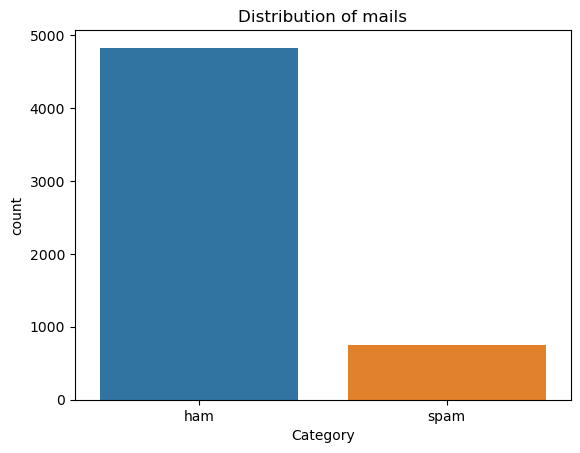

In [9]:
sns.countplot(data=df, x='v1')
plt.xlabel('Category')
plt.ylabel('count')
plt.title('Distribution of mails')
plt.show()


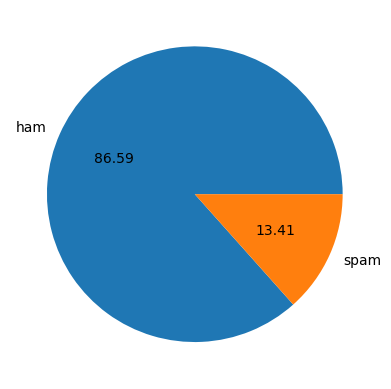

In [10]:
 plt.pie(df['v1'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

### label encoding

In [11]:
df.replace({'v1':{'spam':0}},inplace=True)
df.replace({'v1':{'ham':1}},inplace=True)


In [12]:
df.head()

,v1,v2
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


# Train test split

In [13]:
X = df["v2"]
y = df["v1"]


In [14]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [15]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: v1, Length: 5572, dtype: int64

In [16]:
from sklearn.model_selection  import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=1)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words='english')

In [18]:
vect.fit(X_train)

CountVectorizer(stop_words='english')

In [19]:
X_train_transformed = vect.transform(X_train)
X_test_tranformed =vect.transform(X_test)

# Building model

In [20]:
from sklearn.naive_bayes import MultinomialNB

naive_b = MultinomialNB()


In [21]:
naive_b.fit(X_train_transformed,y_train)

MultinomialNB()

In [22]:
y_pred= naive_b.predict(X_test_tranformed)

print(y_pred)

[1 1 1 ... 0 1 1]


In [23]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)


0.9850478468899522

In [24]:
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred))


PRECISION SCORE : 0.9890485968514716
RECALL SCORE : 0.9938101788170564
F1 SCORE : 0.9914236706689536


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       211
           1       0.99      0.99      0.99      1461

    accuracy                           0.99      1672
   macro avg       0.96      0.97      0.97      1672
weighted avg       0.99      0.99      0.99      1672

